<a href="https://colab.research.google.com/github/LingxiaoGao/ELEC4630/blob/main/%E2%80%9CDlib_Exercise_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ELEC4630 Exercise on Face Recognition
First check if the dlib library is installed

In [1]:
!pip install dlib
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


Get some sample images from gitHub and place them a folder called 'images'.

In [16]:
# First store some sample images in the folder 'images'
!mkdir -p images
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/a1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/a20.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/b1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/c1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/d1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/e1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/f1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/g1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/h1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/i1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/j1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/k1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/l1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/m1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/n1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/o1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/p1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/q1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/r1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/s1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/t1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/u1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/v1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/w1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/x1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/y1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/z1.jpg
!cd images; wget -nc https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/za1.jpg


File ‘a1.jpg’ already there; not retrieving.

--2021-05-25 10:24:38--  https://raw.githubusercontent.com/LingxiaoGao/ELEC4630/master/faces/a20.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202326 (198K) [image/jpeg]
Saving to: ‘a20.jpg’

a20.jpg             100%[===================>] 197.58K  --.-KB/s    in 0.02s   

2021-05-25 10:24:38 (10.3 MB/s) - ‘a20.jpg’ saved [202326/202326]

File ‘b1.jpg’ already there; not retrieving.

File ‘c1.jpg’ already there; not retrieving.

File ‘d1.jpg’ already there; not retrieving.

File ‘e1.jpg’ already there; not retrieving.

File ‘f1.jpg’ already there; not retrieving.

File ‘g1.jpg’ already there; not retrieving.

File ‘h1.jpg’ already there; not retrieving.

File ‘i1.jpg’ already there; not retrieving.

File ‘j1

Now install the face recognition module from Dlib

In [12]:
!pip3 install face_recognition

Now lets find some faces!

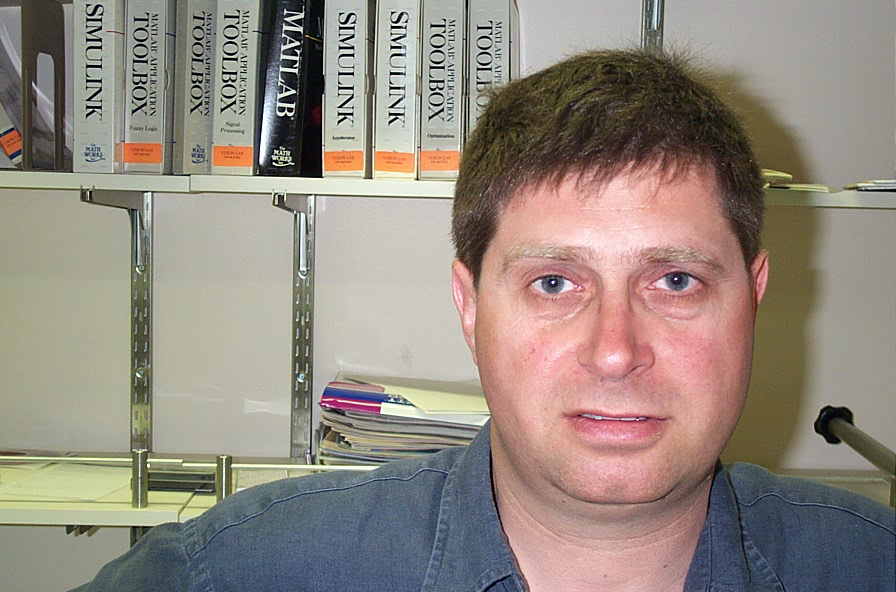

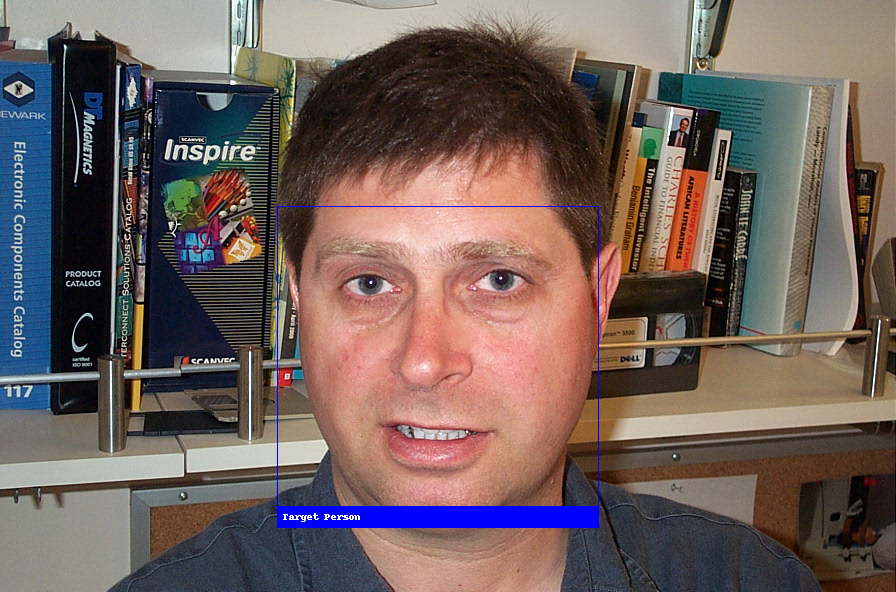

In [17]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
#target_face_encoding = []
#for x in range(1, 28)

target_image = face_recognition.load_image_file("images/a1.jpg")
target_face_encoding = face_recognition.face_encodings(target_image)[0]
target=Image.fromarray(target_image)
display(target)


# Load a second sample picture and learn how to recognize it.
#biden_image = face_recognition.load_image_file("images/biden.jpg")
#biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    target_face_encoding,
]
known_face_names = [
    "Target Person",
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("images/a20.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
# pil_image.show()  does not work in iPython
display(pil_image)

# You can also save a copy of the new image to disk if you want by uncommenting this line
# pil_image.save("image_with_boxes.jpg")